# Energy Price Prediction

"Real-time electricity pricing models can potentially lead to economic and environmental advantages compared to the current common flat rates. In particular, they can provide end users with the opportunity to reduce their electricity expenditures by responding to pricing that varies with different times of the day. However, recent studies have revealed that the lack of knowledge among users about how to respond to time-varying prices as well as the lack of effective building automation systems are two major barriers for fully utilizing the potential benefits of real-time pricing tariffs. We tackle these problems by proposing an optimal and automatic residential energy consumption scheduling framework which attempts to achieve a desired trade-off between minimizing the electricity payment and minimizing the waiting time for the operation of each appliance in household in presence of a real-time pricing tariff combined with inclining block rates . Our design requires minimum effort from the users and is based on simple linear programming computations. Moreover, we argue that any residential load control strategy in real-time electricity pricing environments requires price prediction capabilities. This is particularly true if the utility companies provide price information only one or two hours ahead of time. Simulation results show that the combination of the proposed energy consumption scheduling design and the price predictor filter leads to significant reduction not only in users' payments but also in the resulting peak-to-average ratio in load demand for various load scenarios. Therefore, the deployment of the proposed optimal energy consumption scheduling schemes is beneficial for both end users and utility companies." 

## Data Contents 
This dataset contains four years of electrical consumption, generation, pricing, and weather data for Spain. Consumption and generation data was retrieved from ENTSOE a public portal for Transmission Service Operator (TSO) data. Settlement prices were obtained from the Spanish TSO Red Electric España.

## Columns
* Time: Datetime index localized to CET
* Generation biomass: biomass generation in MW
* Generation fossil brown coal/lignite: coal/lignite generation in MW
* Generation fossil coal-derived gas: coal gas generation in MW
* Generation fossil gas: gas generation in MW
* Generation fossil hard coal: coal generation in MW
* Generation fossil oil: oil generation in MW
* Generation fossil oil shale: shale oil generation in MW
* Generation fossil peat: peat generation in MW
* Generation geothermal: geothermal generation in MW
* Generation hydro pumped storage aggregated: hydro1 generation in MW
* Generation hydro pumped storage consumption: hydro2 generation in MW
* Generation hydro run-of-river and poundage: hydro3 generation in MW
* Generation hydro water reservoir: hydro4 generation in MW
* Generation marine: sea generation in MW
* Generation nuclear: nuclear generation in MW
* Generation other: other generation in MW
* Generation other renewable: other renewable generation in MW
* Generation solar: solar generation in MW
* Generation waste: waste generation in MW
* Generation wind offshore: wind offshore generation in MW
* Generation wind onshore: wind onshore generation in MW
* Gorecast solar day ahead: forecasted solar generation
* Gorecast wind offshore eday ahead: forecasted offshore wind generation
* Gorecast wind onshore day ahead: forecasted onshore wind generation
* Total load forecast: forecasted electrical demand
* Total load actual: actual electrical demand
* Price day ahead: forecasted price EUR/MWh
* Price actual: price in EUR/MWh

## Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load the data

In [2]:
df = pd.read_csv('energy_dataset.csv')
df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [3]:
df.tail()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
35059,2018-12-31 19:00:00+01:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,...,277.0,0.0,3113.0,96.0,NaN,3253.0,30619.0,30653.0,68.85,77.02
35060,2018-12-31 20:00:00+01:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,...,280.0,0.0,3288.0,51.0,NaN,3353.0,29932.0,29735.0,68.40,76.16
35061,2018-12-31 21:00:00+01:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,...,286.0,0.0,3503.0,36.0,NaN,3404.0,27903.0,28071.0,66.88,74.30
35062,2018-12-31 22:00:00+01:00,293.0,0.0,0.0,6562.0,2293.0,163.0,0.0,0.0,0.0,...,287.0,0.0,3586.0,29.0,NaN,3273.0,25450.0,25801.0,63.93,69.89
35063,2018-12-31 23:00:00+01:00,290.0,0.0,0.0,6926.0,2166.0,163.0,0.0,0.0,0.0,...,287.0,0.0,3651.0,26.0,NaN,3117.0,24424.0,24455.0,64.27,69.88


In [4]:
df.shape

(35064, 29)

In [5]:
df.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')

In [6]:
df.isnull().sum()

time                                               0
generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                              

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

In [8]:
df.describe(include='all')

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35064,35045.000000,35046.000000,35046.0,35046.000000,35046.000000,35045.000000,35046.0,35046.0,35046.0,...,35045.000000,35046.0,35046.000000,35064.000000,0.0,35064.000000,35064.000000,35028.000000,35064.000000,35064.000000
unique,35064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2015-01-01 00:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,383.513540,448.059208,0.0,5622.737488,4256.065742,298.319789,0.0,0.0,0.0,...,269.452133,0.0,5464.479769,1439.066735,NaN,5471.216689,28712.129962,28696.939905,49.874341,57.884023
std,NaN,85.353943,354.568590,0.0,2201.830478,1961.601013,52.520673,0.0,0.0,0.0,...,50.195536,0.0,3213.691587,1677.703355,NaN,3176.312853,4594.100854,4574.987950,14.618900,14.204083
min,NaN,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,NaN,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,NaN,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,...,240.000000,0.0,2933.000000,69.000000,NaN,2979.000000,24793.750000,24807.750000,41.490000,49.347500
50%,NaN,367.000000,509.000000,0.0,4969.000000,4474.000000,300.000000,0.0,0.0,0.0,...,279.000000,0.0,4849.000000,576.000000,NaN,4855.000000,28906.000000,28901.000000,50.520000,58.020000
75%,NaN,433.000000,757.000000,0.0,6429.000000,5838.750000,330.000000,0.0,0.0,0.0,...,310.000000,0.0,7398.000000,2636.000000,NaN,7353.000000,32263.250000,32192.000000,60.530000,68.010000


Columns - 'generation hydro pumped storage aggregated' and 'forecast wind offshore eday ahead' has 0 non-null values so dropping them   

In [9]:
df = df.drop([ 'time','generation hydro pumped storage aggregated','forecast wind offshore eday ahead'],axis=1)
df.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage consumption,...,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,863.0,...,49.0,196.0,0.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41
1,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,920.0,...,50.0,195.0,0.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92
2,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,1164.0,...,50.0,196.0,0.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48
3,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,1503.0,...,50.0,191.0,0.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32
4,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,1826.0,...,42.0,189.0,0.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04


In [10]:
df.shape

(35064, 26)

In [11]:
df = df.dropna()

In [12]:
df.shape

(35017, 26)

In [13]:
df.isnull().sum()

generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil coal-derived gas             0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation fossil oil shale                    0
generation fossil peat                         0
generation geothermal                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation marine                              0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind offshore                       0
generation wind onshore                        0
forecast solar day a

In [14]:
df.nunique()

generation biomass                               423
generation fossil brown coal/lignite             956
generation fossil coal-derived gas                 1
generation fossil gas                           8293
generation fossil hard coal                     7265
generation fossil oil                            321
generation fossil oil shale                        1
generation fossil peat                             1
generation geothermal                              1
generation hydro pumped storage consumption     3311
generation hydro run-of-river and poundage      1684
generation hydro water reservoir                7029
generation marine                                  1
generation nuclear                              2388
generation other                                 103
generation other renewable                        78
generation solar                                5331
generation waste                                 262
generation wind offshore                      

In [15]:
df = df.drop(['generation fossil coal-derived gas',
             'generation fossil oil shale',
             'generation fossil peat',
             'generation geothermal',
             'generation wind offshore',
             'generation marine'], axis=1)
df.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41
1,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92
2,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48
3,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32
4,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04


Dropped the columns which has NaN values

In [16]:
df.shape

(35017, 20)

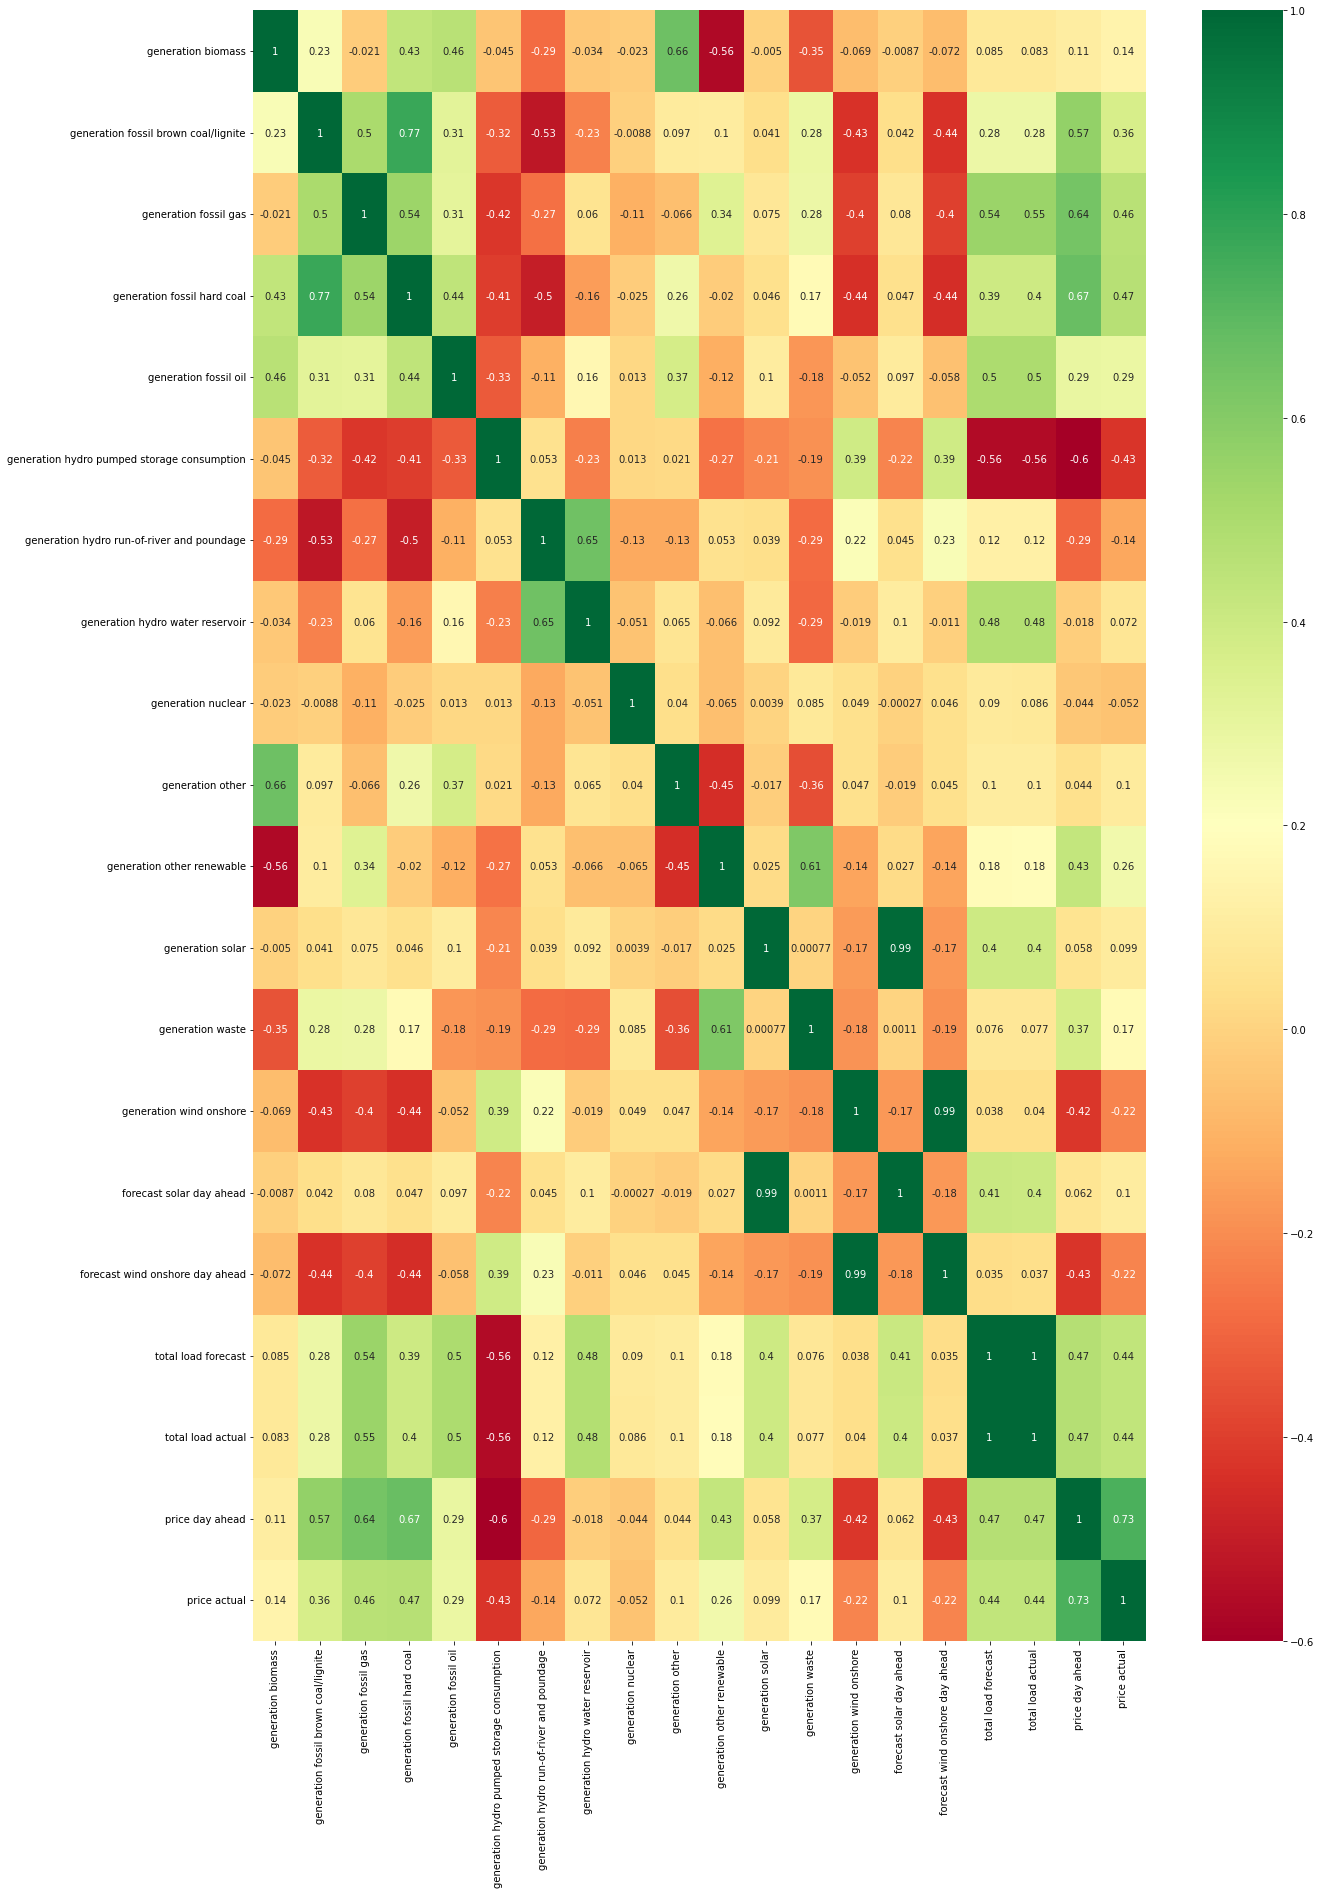

In [17]:
corr = df.corr()
features = corr.index
plt.figure(figsize=(20,30))
ax = sns.heatmap(df[features].corr(),annot=True,cmap='RdYlGn')

In [18]:
correlation = df.corr(method='pearson')
correlation

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
generation biomass,1.000000,0.229608,-0.021187,0.433113,0.458499,-0.044836,-0.285804,-0.034102,-0.023269,0.658608,-0.563450,-0.005010,-0.348220,-0.069010,-0.008692,-0.072183,0.085351,0.083211,0.108867,0.142799
generation fossil brown coal/lignite,0.229608,1.000000,0.500119,0.768905,0.314732,-0.323907,-0.525184,-0.229371,-0.008795,0.097381,0.104013,0.040535,0.282625,-0.434509,0.042471,-0.436250,0.278777,0.280531,0.568146,0.364206
generation fossil gas,-0.021187,0.500119,1.000000,0.542141,0.310711,-0.420602,-0.271238,0.060461,-0.112049,-0.065878,0.336101,0.074938,0.276167,-0.397280,0.080235,-0.397565,0.543711,0.548947,0.640889,0.461918
generation fossil hard coal,0.433113,0.768905,0.542141,1.000000,0.440374,-0.406085,-0.498581,-0.158107,-0.025069,0.264419,-0.020198,0.046091,0.170160,-0.442063,0.047454,-0.444425,0.394443,0.396637,0.671667,0.466703
generation fossil oil,0.458499,0.314732,0.310711,0.440374,1.000000,-0.331405,-0.107619,0.160220,0.013163,0.374703,-0.117448,0.099879,-0.177810,-0.052254,0.096547,-0.058051,0.499435,0.497069,0.293068,0.285351
generation hydro pumped storage consumption,-0.044836,-0.323907,-0.420602,-0.406085,-0.331405,1.000000,0.053081,-0.234372,0.013061,0.021289,-0.268075,-0.214677,-0.188762,0.389000,-0.222111,0.390459,-0.559710,-0.562790,-0.600351,-0.427032
generation hydro run-of-river and poundage,-0.285804,-0.525184,-0.271238,-0.498581,-0.107619,0.053081,1.000000,0.652604,-0.125676,-0.127777,0.053104,0.039457,-0.286875,0.223133,0.045134,0.226659,0.120728,0.118587,-0.294703,-0.136752
generation hydro water reservoir,-0.034102,-0.229371,0.060461,-0.158107,0.160220,-0.234372,0.652604,1.000000,-0.050910,0.065153,-0.065858,0.091796,-0.288595,-0.019229,0.103185,-0.011386,0.476733,0.479489,-0.017820,0.072210
generation nuclear,-0.023269,-0.008795,-0.112049,-0.025069,0.013163,0.013061,-0.125676,-0.050910,1.000000,0.040392,-0.065065,0.003860,0.084965,0.048804,-0.000265,0.046060,0.090389,0.085598,-0.043937,-0.051817
generation other,0.658608,0.097381,-0.065878,0.264419,0.374703,0.021289,-0.127777,0.065153,0.040392,1.000000,-0.445720,-0.016687,-0.362431,0.047058,-0.019080,0.044612,0.101596,0.100666,0.043950,0.099759


In [19]:
print(correlation ['price actual'].sort_values(ascending=False).to_string())

price actual                                   1.000000
price day ahead                                0.733508
generation fossil hard coal                    0.466703
generation fossil gas                          0.461918
total load forecast                            0.436235
total load actual                              0.435873
generation fossil brown coal/lignite           0.364206
generation fossil oil                          0.285351
generation other renewable                     0.256398
generation waste                               0.169290
generation biomass                             0.142799
forecast solar day ahead                       0.101463
generation other                               0.099759
generation solar                               0.098774
generation hydro water reservoir               0.072210
generation nuclear                            -0.051817
generation hydro run-of-river and poundage    -0.136752
generation wind onshore                       -0

## Handling outliers

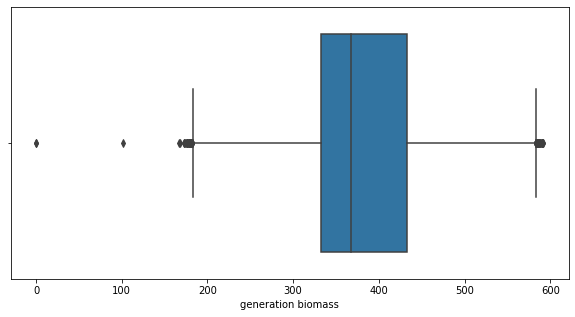

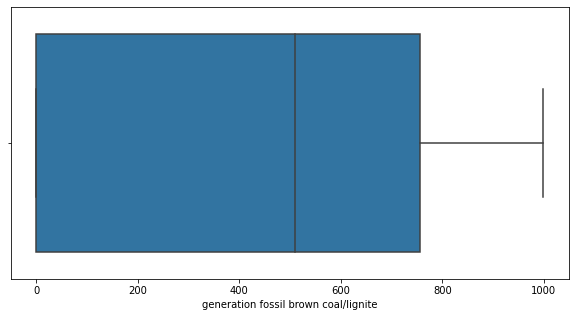

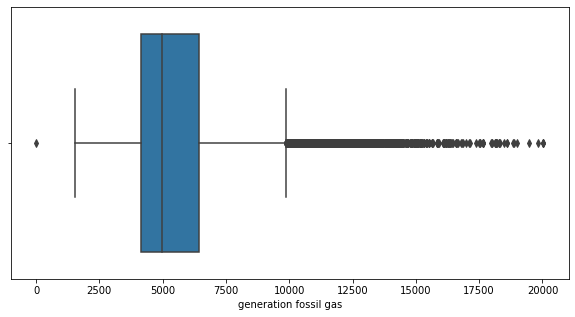

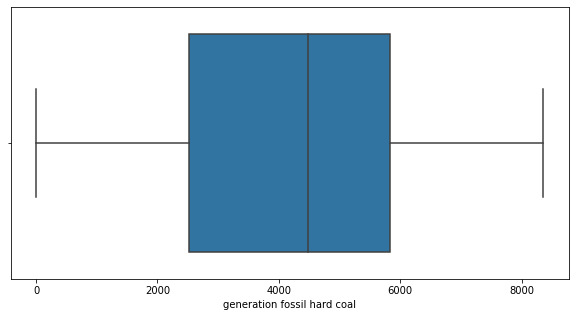

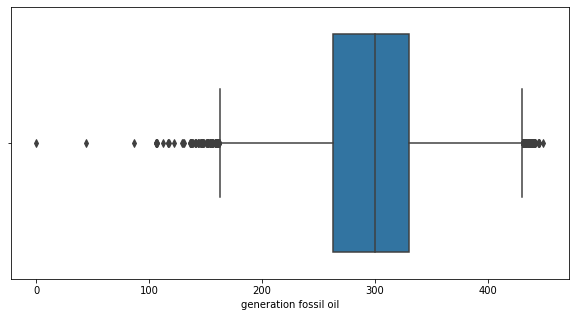

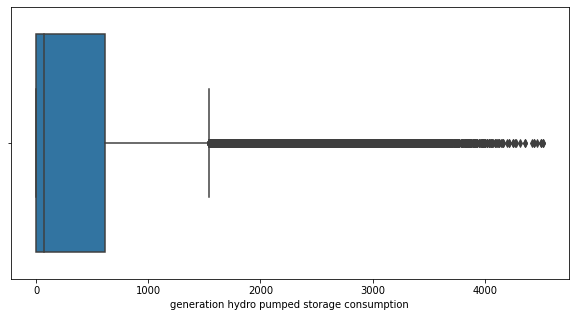

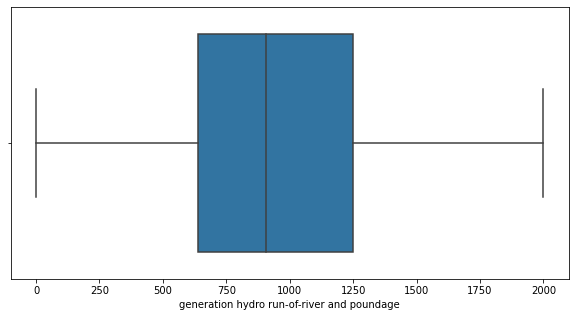

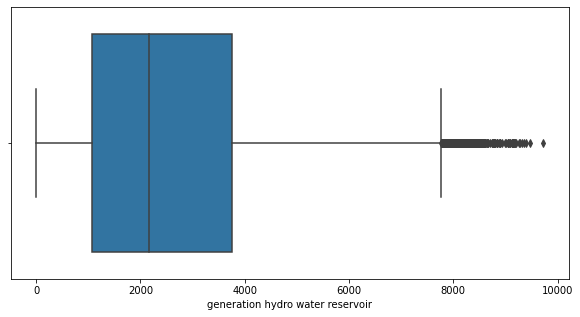

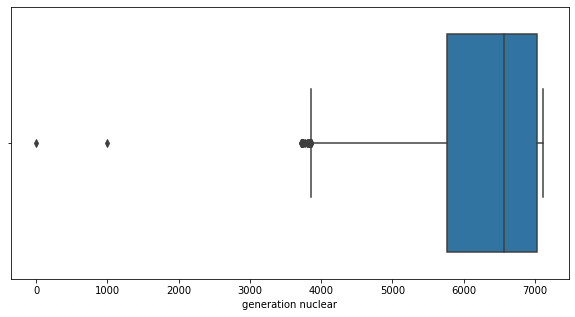

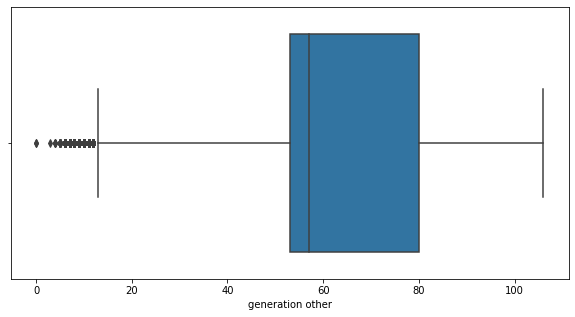

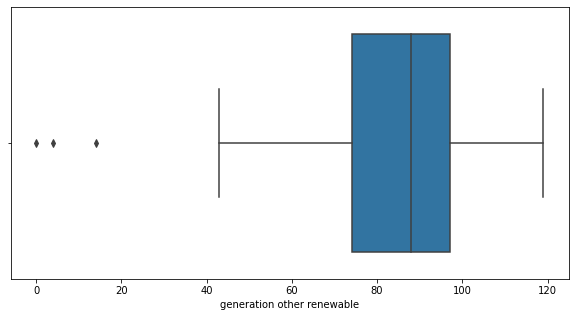

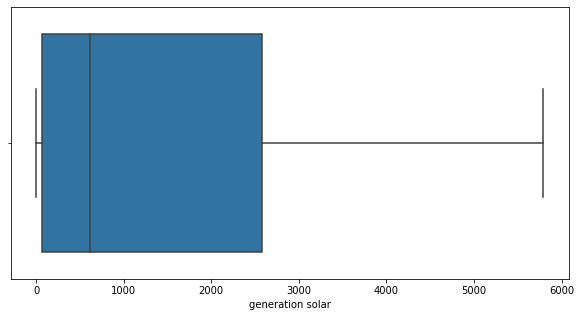

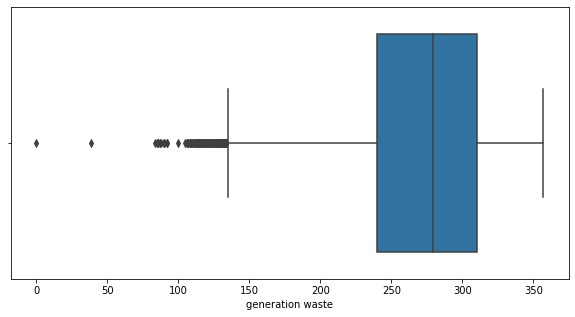

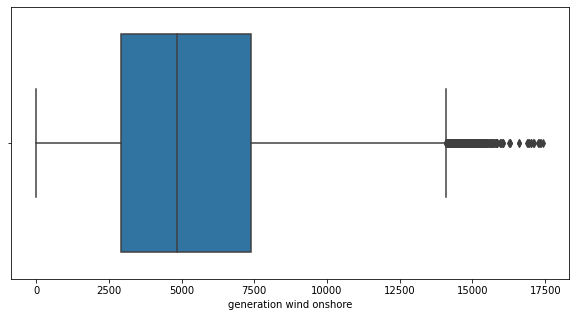

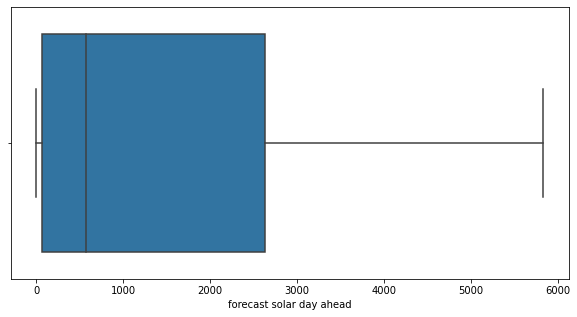

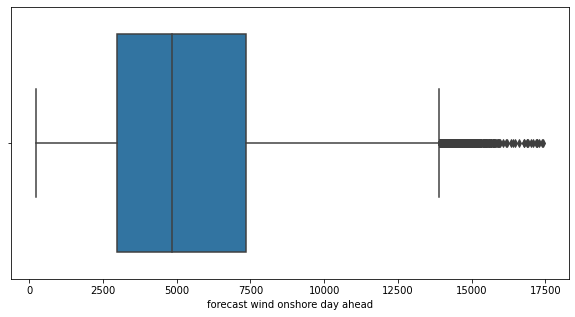

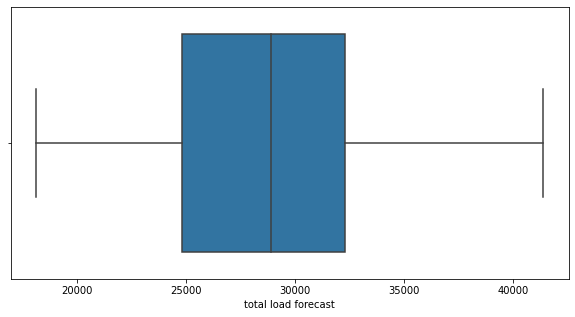

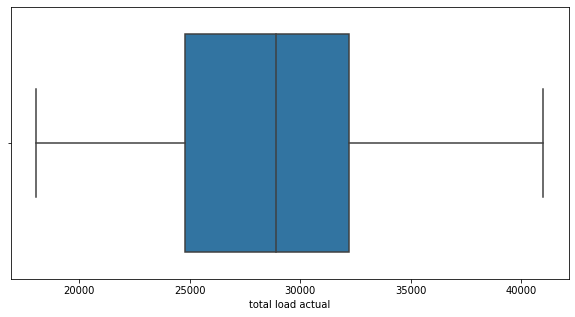

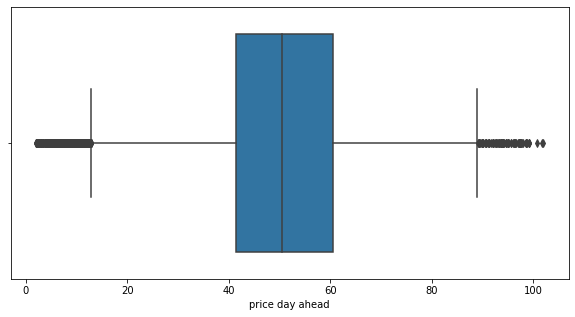

In [20]:
for column in df.columns[0:-1]:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=(column),data=df)

In [21]:
for column in df.columns:
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    q2=q3-q1
    lower_range=q1-(1.5*q2)
    upper_range=q3+(1.5*q2)
    df[column]=np.where(df[column]<lower_range,lower_range,df[column])
    df[column]=np.where(df[column]>upper_range,upper_range,df[column])

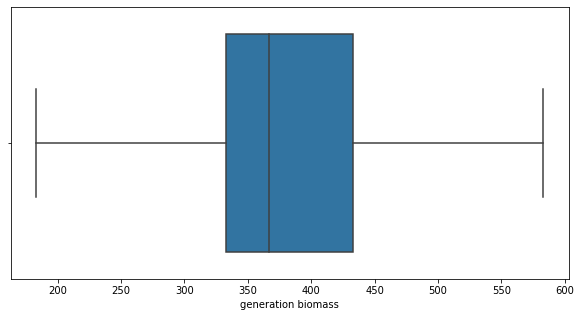

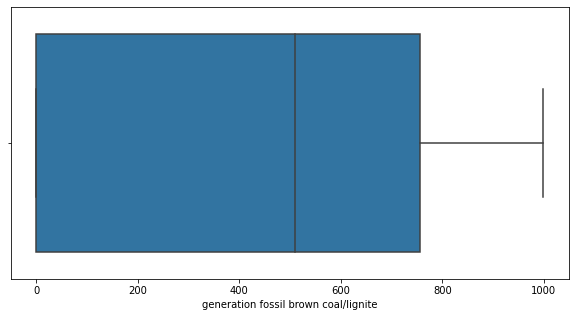

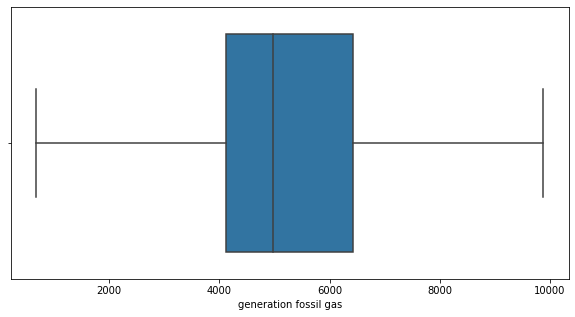

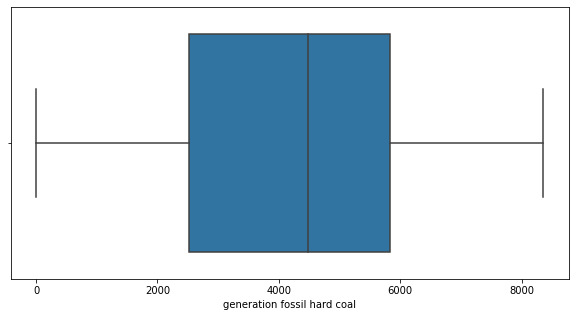

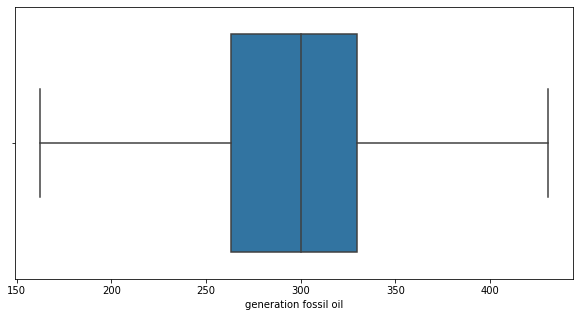

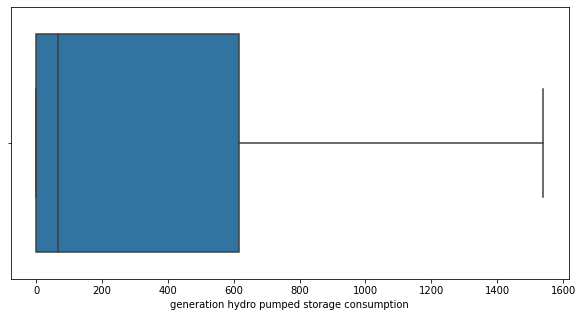

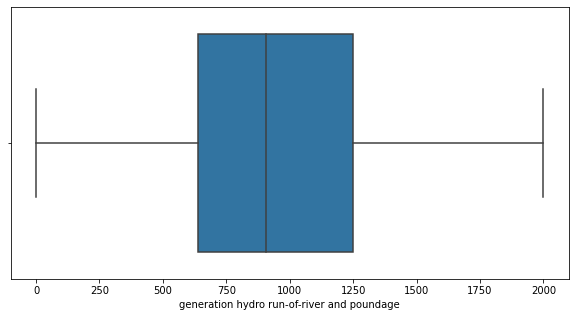

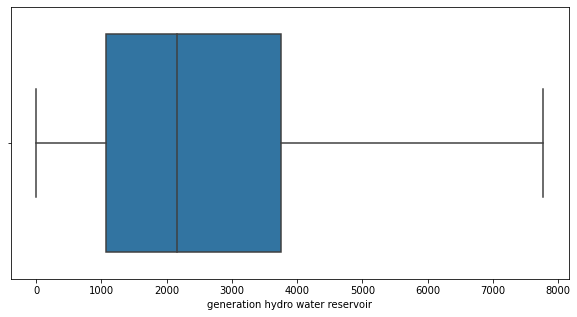

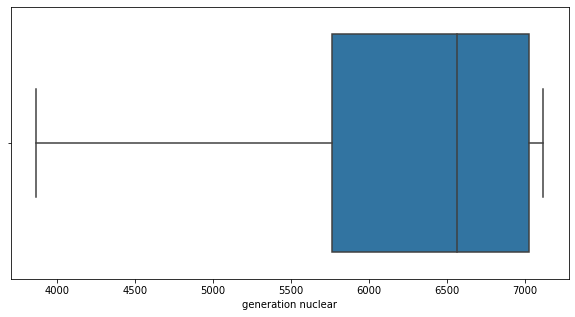

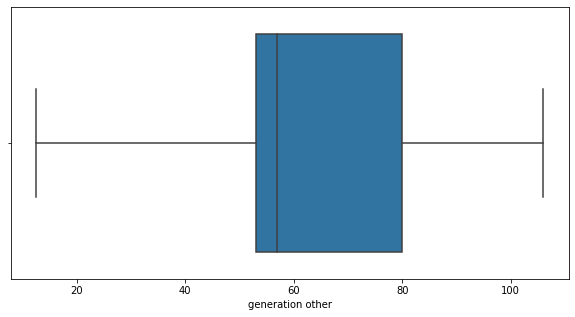

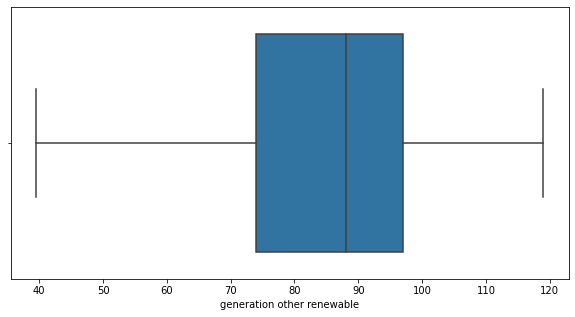

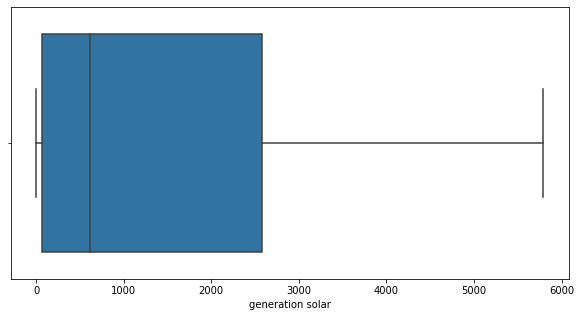

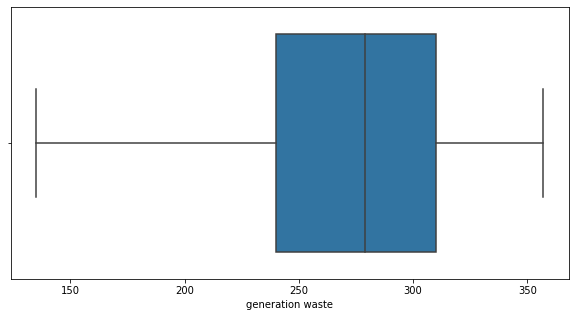

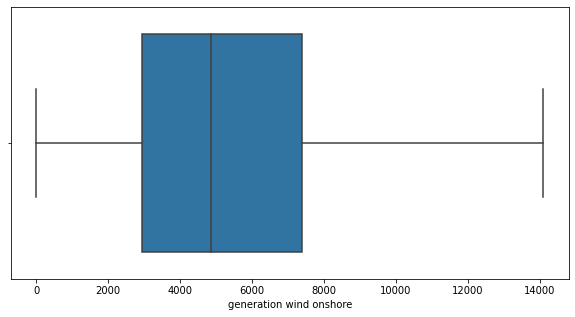

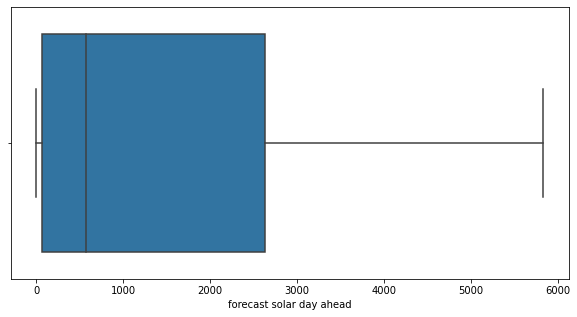

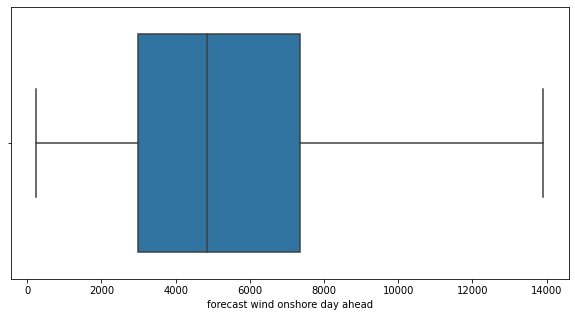

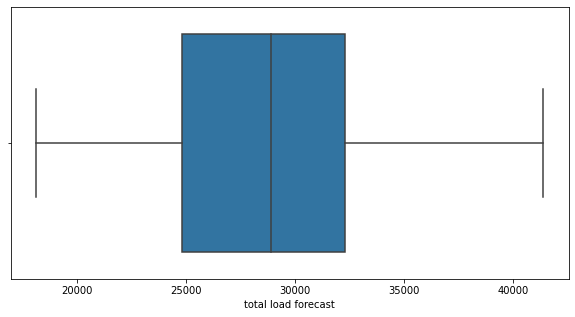

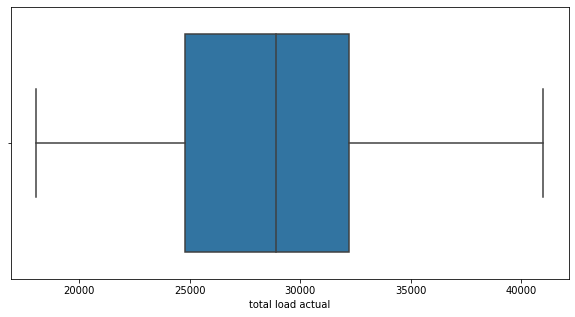

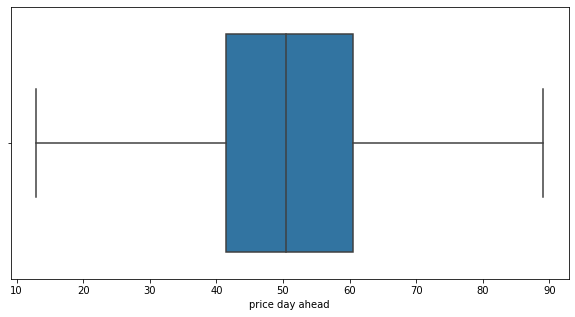

In [22]:
for column in df.columns[0:-1]:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=(column),data=df)

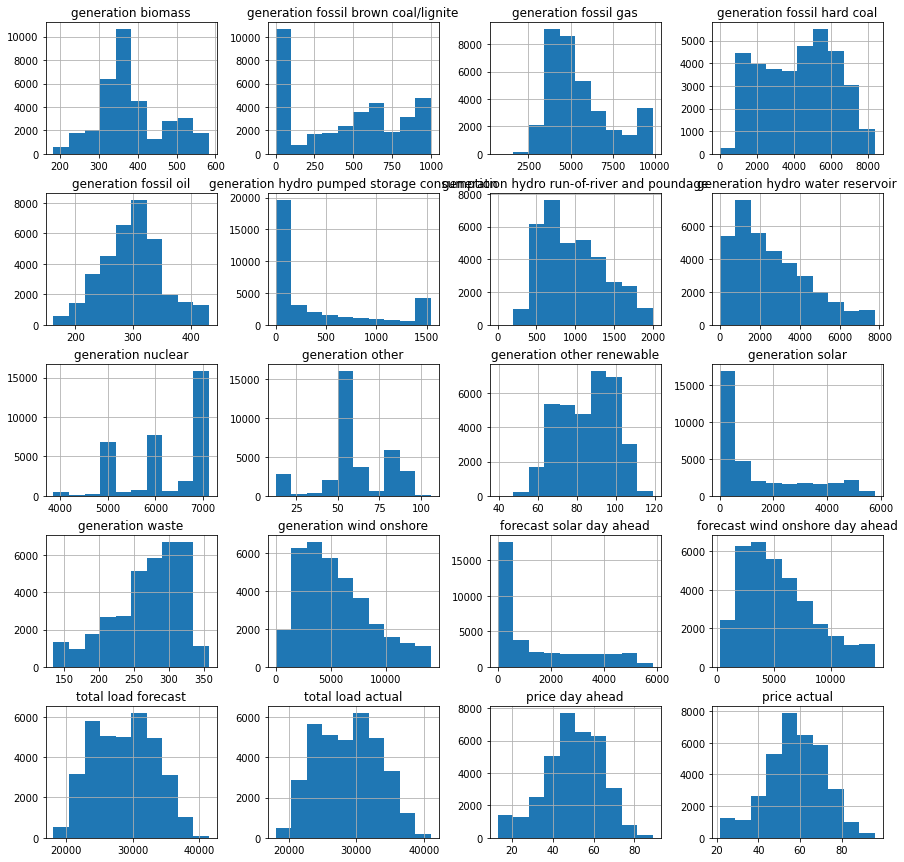

In [23]:
plot = df.hist(figsize=(15,15))

<AxesSubplot:xlabel='total load actual', ylabel='price actual'>

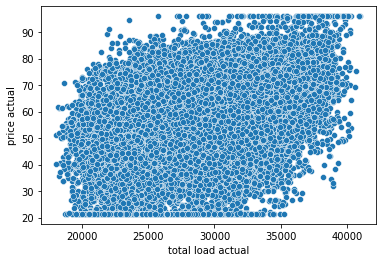

In [24]:
sns.scatterplot(x='total load actual', y='price actual', data=df)

In [25]:
y = df['price actual']
X = df.drop(['price actual'],axis=1)

## Train Test Split

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
print('X_train shape: ',X_train.shape)
print('X_test shape: ',X_test.shape)
print('y_train shape: ',y_train.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (28013, 19)
X_test shape:  (7004, 19)
y_train shape:  (28013,)
y_test shape:  (7004,)


## Model building and Evaluation

In [29]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
print('Training accuracy : ',model.score(X_train,y_train))

Training accuracy :  0.5735875669367944


In [30]:
y_pred=model.predict(X_test)
y_pred

array([46.47881119, 71.96282025, 53.0443273 , ..., 59.56027606,
       60.78220383, 62.56091631])

In [31]:
print('Test accuracy : ',model.score(X_test,y_test))

Test accuracy :  0.5713535115468533


In [33]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor()
model2.fit(X_train,y_train)
print('Training accuracy : ',model2.score(X_train,y_train))

Training accuracy :  0.9778931204590211


In [34]:
y_pred=model2.predict(X_test)
y_pred

array([49.485 , 49.5322, 53.0317, ..., 53.9488, 63.4586, 60.0303])

In [36]:
print('Test accuracy : ',model2.score(X_test,y_test))

Test accuracy :  0.8425433619279061
